In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# torch.manual_seed(1)    # reprodecible

In [4]:
# Hyper Parameters
INPUT_SIZE = 1          # rnn input size / image width
LR = 0.02               # learning rate

In [5]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(    # if use nn.RNN(), it hardly learns
            input_size=1,
            hidden_size=32,    # rnn hidden unit
            num_layers=1,      # number of rnn layer
            batch_first=True,  # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)
        
        outs = []                                 # this is where you can find torch is dynamic
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [6]:
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [13]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)  # optimize all cnn parameters
loss_func = nn.MSELoss()                               # calculate output for each time step

In [14]:
h_state = None # for initial hidden state

10
30
10
30
20
20
10
30
10
20
20
30
10
20
30
10
30
30
10
20
30
10
10
20
20
20
10
30
10
10
30
10
30
30
20
20
30
20
20
30
10
30
30
20
10
30
20
30
10
10
10
30
30
20
30
20
20
20
10
10


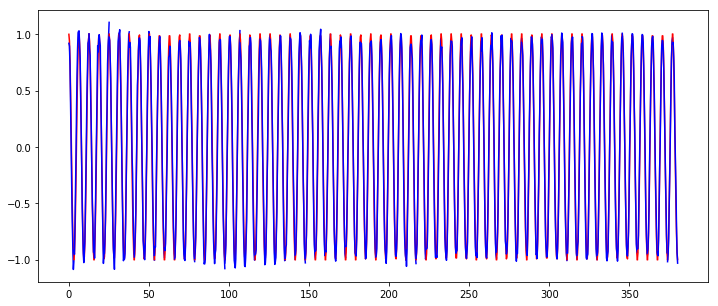

In [23]:
plt.figure(1, figsize=(12, 5))
plt.ion()   # continuously plot

########################  Below is different #########################

################ static time steps ##########
# for step in range(60):
#     start, end = step * np.pi, (step+1)*np.pi   # time steps
#     # use sin predicts cos
#     steps = np.linspace(start, end, 10, dtype=np.float32)

################ dynamic time steps #########
step = 0
for i in range(60):
    dynamic_steps = np.random.randint(1, 4) # has random time steps
    start, end = step * np.pi, (step + dynamic_steps) * np.pi # different time steps length
    step += dynamic_steps
    
    # use sin predicts cos
    steps = np.linspace(start, end, 10 * dynamic_steps, dtype=np.float32)
    
#######################  Above is different ###########################

    print(len(steps))    # print how many time step feed ro RNN
    
    x_np = np.sin(steps) # float32 for converting torch FloatTensor
    y_np = np.cos(steps)
    
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    
    prediction, h_state = rnn(x, h_state)    # rnn output
    #  !! next step is important !!
    h_state = h_state.data     # repack the hidden state, break the connection from last iteration
    
    loss = loss_func(prediction, y)    # calculate loss
    optimizer.zero_grad()              # clear gradients for this training step
    loss.backward()                    # backpropagation, compute gradients
    optimizer.step()                   # apply gradients
    
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    #plt.pause(0.05)
    
plt.ioff()
plt.show()  